# **MÓDULO 20 - Projeto de Credit Score - Naive Bayes**


No módulo 17 vocês realizaram a primeira etapa do projeto de crédito de vocês.
Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste.
Nessa aula aplicaremos o algoritmo de naive bayes a base de vocês afim de tentarmos trazer previsões do score de crédito.

**IMPORTANTE:** Não se esqueçam de ao enviar o código de vocês para os tutores, enviarem as bases, pois como cada um de vocês realizou as alterações de tratamento indidualmente o tutor precisa ter acesso aos seus dados individuais.

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

In [23]:
df =pd.read_csv(r"C:\Users\Léo\Downloads\ciencia de dados\modulo 20\CREDIT_SCORE_M20.csv" )

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,Credit Score Num
0,25.0,Female,50000.0,Bachelor's Degree,Single,0,Rented,High,800
1,30.0,Male,100000.0,Master's Degree,Married,2,Owned,High,800
2,35.0,Female,75000.0,Doctorate,Married,1,Owned,High,800
3,40.0,Male,125000.0,High School Diploma,Single,0,Owned,High,800
4,45.0,Female,100000.0,Bachelor's Degree,Married,3,Owned,High,800
5,50.0,Male,150000.0,Master's Degree,Married,0,Owned,High,800
6,26.0,Female,40000.0,Associate's Degree,Single,0,Rented,Average,650
7,31.0,Male,60000.0,Bachelor's Degree,Single,0,Rented,Average,650
8,NaN,Female,80000.0,Master's Degree,Married,2,Owned,High,800
9,NaN,Male,105000.0,Doctorate,Single,0,Owned,High,800


Durante a aula nossa variável a ser prevista (churn) continha apenas 2 categorias, a base de vocês contém mais. O Naive Bayes pode ser aplicado para problemas de classificação com múltiplas classes da mesma forma que para problemas de classificação binária. O Naive Bayes é um algoritmo de classificação probabilístico que calcula a probabilidade de uma amostra pertencer a cada classe e seleciona a classe com a maior probabilidade como a previsão final.
Em resumo, o Naive Bayes pode ser aplicado da mesma maneira para problemas de classificação com múltiplas classes, e os mesmos princípios se aplicam em termos de treinamento, avaliação e aplicação do modelo.

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [24]:
X = df.drop(columns=['Credit Score', 'Credit Score Num'])
y = df[ 'Credit Score']

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.3, random_state=42, stratify=y
)

print("Dimensão total da base:", df.shape)
print("Linhas treino:", X_train.shape[0], " | Linhas teste:", X_test.shape[0])
print("Variáveis em X:", X.columns.tolist())
print("Variável em y:", y.name)

print("\nDistribuição de Y no teste:")
print(y_test.value_counts(normalize=True))

Dimensão total da base: (164, 9)
Linhas treino: 114  | Linhas teste: 50
Variáveis em X: ['Age', 'Gender', 'Income', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership']
Variável em y: Credit Score

Distribuição de Y no teste:
Credit Score
High       0.68
Average    0.22
Low        0.10
Name: proportion, dtype: float64


# 2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.

In [25]:
df.columns = df.columns.str.strip()

X = pd.get_dummies(X, drop_first=True)

imputer = SimpleImputer(strategy='mean')  
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de confusão:")
print(confusion_matrix(y_test, y_pred))


Acurácia: 1.0

Relatório de classificação:
              precision    recall  f1-score   support

     Average       1.00      1.00      1.00        11
        High       1.00      1.00      1.00        34
         Low       1.00      1.00      1.00         5

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50


Matriz de confusão:
[[11  0  0]
 [ 0 34  0]
 [ 0  0  5]]


# 3) Faça a avaliação do modelo com os dados de treinamento.
Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com suas palavras o desempenho do modelo, interpretando as métricas.

Dica: Para calcularmos o recall em classificação multi classe precisamos usar o atributo macro:
recall = recall_score(y_train, y_pred_train, average='macro')

Acurácia no treino: 0.9824561403508771
Recall (macro) no treino: 0.9824472573839662

Matriz de confusão no treino:
[[24  1  0]
 [ 1 78  0]
 [ 0  0 10]]


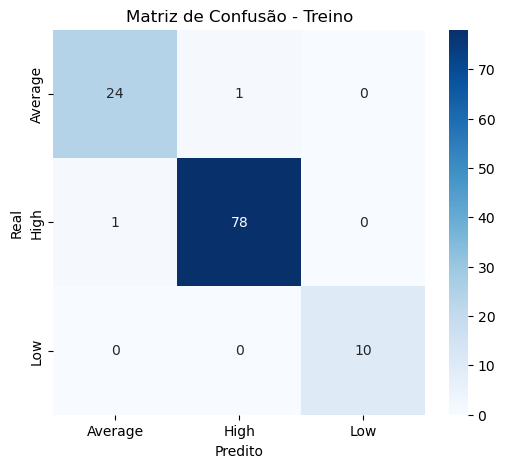

In [26]:
y_pred_train = nb.predict(X_train)

accuracy_train = accuracy_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train, average='macro')

print("Acurácia no treino:", accuracy_train)
print("Recall (macro) no treino:", recall_train)

cm_train = confusion_matrix(y_train, y_pred_train)
print("\nMatriz de confusão no treino:")
print(cm_train)

plt.figure(figsize=(6,5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Treino')
plt.show()

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

Acurácia no teste: 1.0
Recall (macro) no teste: 1.0

Matriz de confusão no teste:
[[11  0  0]
 [ 0 34  0]
 [ 0  0  5]]


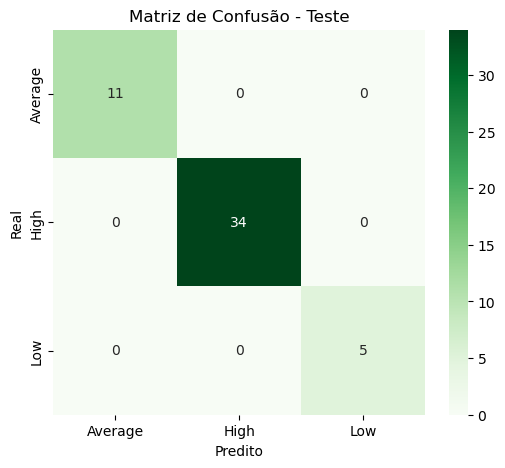

In [27]:
y_pred_test = nb.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='macro')

print("Acurácia no teste:", accuracy_test)
print("Recall (macro) no teste:", recall_test)

cm_test = confusion_matrix(y_test, y_pred_test)
print("\nMatriz de confusão no teste:")
print(cm_test)

plt.figure(figsize=(6,5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Teste')
plt.show()


# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de crédito.
Utilize pelo menos 4 linhas.

Dica: Caso você ainda esteja tendo dificuldade em visualizar a aplicação dos projetos e objetivo, consulte seus tutores!

    Neste projeto, trabalhamos com uma base de dados de clientes contendo informações demográficas, renda, estado civil, escolaridade, propriedade da casa e histórico de crédito. Nosso objetivo principal foi aplicar o algoritmo Naive Bayes para classificar o score de crédito dos clientes (High, Average, Low) com base nas variáveis fornecidas. Para isso, realizamos o pré-processamento dos dados, tratando valores faltantes e transformando variáveis categóricas em numéricas, além de separar a base em conjuntos de treino e teste. Com a avaliação das métricas de acurácia, recall e análise das matrizes de confusão, conseguimos medir o desempenho do modelo e verificar sua capacidade de generalização para novos clientes.


In [28]:
df.to_csv("CREDIT_SCORE_M21.csv", index=False)
